# Libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading the file

In [2]:
df = pd.read_csv('./files/training.zip', sep = ',', compression = 'zip')
df.head()

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
0,PL000000,1.0,0.332,Med2,5,1,Monthly,No,WorkPrivate,M,35.0,16.0,Yes,F,26.0,1.0,aparvvfowrjncdhp,8.0,Gasoline,Tourism,174.0,11040.0,1143.0,1270.0,33.1,0.0
1,PL042495,1.0,0.000,Med2,6,1,Monthly,No,WorkPrivate,M,60.0,41.0,No,0,NaN,NaN,aparvvfowrjncdhp,10.0,Diesel,Tourism,174.0,11040.0,1143.0,1290.0,51.3,0.0
2,PL042496,1.0,0.196,Med1,2,1,Yearly,Yes,Retired,M,55.0,35.0,Yes,F,57.0,38.0,iwhqpdfuhrsxyqxe,8.0,Diesel,Commercial,150.0,14159.0,1193.0,1020.0,262.8,0.0
3,PL042497,1.0,0.000,Med2,8,5,Yearly,No,WorkPrivate,F,54.0,31.0,No,0,NaN,NaN,kvcddisqpkysmvvo,4.0,Gasoline,Tourism,149.0,17233.0,1012.0,180.0,219.7,0.0
4,PL042498,1.0,0.000,Med1,2,2,Yearly,No,Retired,F,65.0,38.0,No,0,NaN,NaN,tdgkjlphosocwbgu,13.0,Gasoline,Tourism,200.0,19422.0,1315.0,30.0,70.3,0.0


In [3]:
df.shape

(228216, 26)

In [4]:
dummy_list = ['pol_coverage','pol_pay_freq','pol_payd','pol_usage','drv_sex1','drv_sex2','vh_make_model',
             'vh_fuel','vh_type']
float_list = ['year','pol_no_claims_discount','pol_duration','pol_sit_duration','drv_age1', 'drv_age_lic1',
              'drv_age2','drv_age_lic2','vh_age','vh_speed','vh_value','vh_weight','population',
              'town_surface_area','claim_amount']
float_list2 =  ['year','pol_no_claims_discount','pol_duration','pol_sit_duration','drv_age1', 'drv_age_lic1',
              'drv_age2','drv_age_lic2','vh_age','vh_speed','vh_value','vh_weight','population',
              'town_surface_area','claim_amount','claim']

# Data cleaning

In [9]:
df['claim'] = df['claim_amount'].apply(lambda x: 0 if x == 0.0 else 1)

In [15]:
df.isna().sum()

id_policy                      0
year                           0
pol_no_claims_discount         0
pol_coverage                   0
pol_duration                   0
pol_sit_duration               0
pol_pay_freq                   0
pol_payd                       0
pol_usage                      0
drv_sex1                       0
drv_age1                       0
drv_age_lic1                   0
drv_drv2                       0
drv_sex2                       0
drv_age2                  152896
drv_age_lic2              152896
vh_make_model                  0
vh_age                         4
vh_fuel                        0
vh_type                        0
vh_speed                    2552
vh_value                    2552
vh_weight                   2552
population                     0
town_surface_area              0
claim_amount                   0
claim                          0
dtype: int64

# EDA 

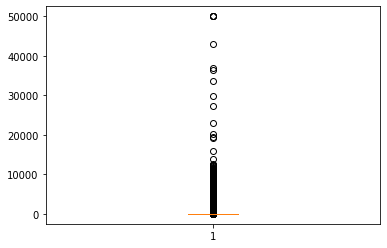

In [8]:
plt.boxplot(df['claim_amount'])
plt.show()

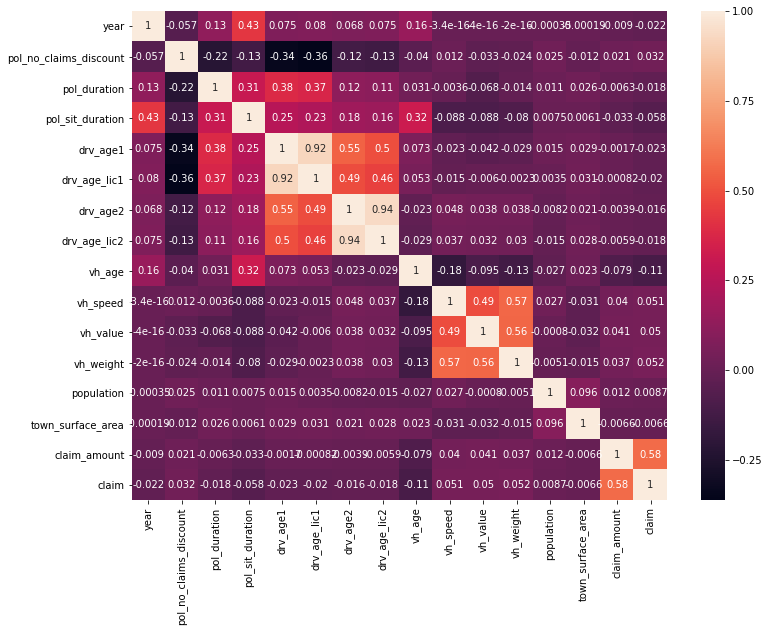

In [13]:
fig, ax = plt.subplots(figsize=(12,9)) 
ax = sns.heatmap(df[float_list2].corr(), annot = True)